## Лабораторная работа №1. Предобработка данных.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

### Загрузка датасета. Исключение бинарных признаков и признаков времени.

In [18]:
df = pd.read_csv('datasets/archive/heart_failure_clinical_records_dataset.csv')

df = df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])

df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116


Построение гистограмм признаков

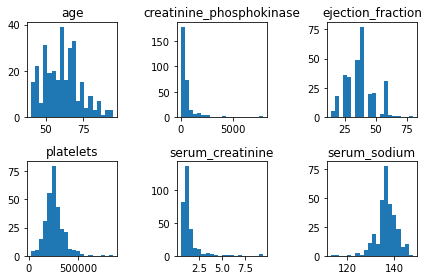

In [19]:
n_bins = 20

fig, axs = plt.subplots(2, 3)

axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')
fig.tight_layout()
plt.show()

### Стандартизация данных

In [26]:
data = df.to_numpy(dtype='float')
scaler = preprocessing.StandardScaler().fit(data[:150,:])
data_scaled = scaler.transform(data)

print(scaler.mean_)
print(scaler.var_)



[6.29466667e+01 6.07153333e+02 3.79466667e+01 2.66746749e+05
 1.52060000e+00 1.36453333e+02]
[1.54997156e+02 1.41548882e+06 1.70023822e+02 9.25286050e+09
 1.36052697e+00 2.06078222e+01]


Мат. ожидание и СКО до и после стандартизации

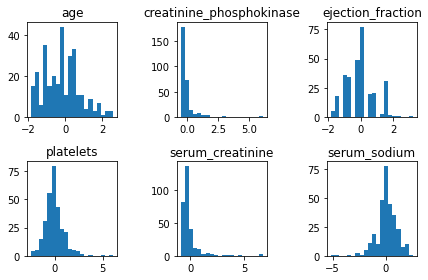

In [21]:
fig, axs = plt.subplots(2,3)

axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

fig.tight_layout()
plt.show()

In [22]:
mean_original = df.mean()
mean = data_scaled.mean()

print(df.describe())

              age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.833893                581.839465          38.083612  263358.029264   
std     11.894809                970.287881          11.834841   97804.236869   
min     40.000000                 23.000000          14.000000   25100.000000   
25%     51.000000                116.500000          30.000000  212500.000000   
50%     60.000000                250.000000          38.000000  262000.000000   
75%     70.000000                582.000000          45.000000  303500.000000   
max     95.000000               7861.000000          80.000000  850000.000000   

       serum_creatinine  serum_sodium  
count         299.00000    299.000000  
mean            1.39388    136.625418  
std             1.03451      4.412477  
min             0.50000    113.000000  
25%             0.90000    134.000000  
50%             1.10000    137

In [23]:
data_from_np = pd.DataFrame({
    'age': data_scaled[:, 0],
    'creatinine_phosphokinase': data_scaled[:, 1],
    'ejection_fraction':  data_scaled[:, 2],
    'platelets':  data_scaled[:, 3],
    'serum_creatinine':  data_scaled[:, 4],
    'serum_sodium':  data_scaled[:, 5]
})

print(data_from_np.describe())

              age  creatinine_phosphokinase  ejection_fraction   platelets  \
count  299.000000                299.000000         299.000000  299.000000   
mean    -0.169704                 -0.021277           0.010502   -0.035229   
std      0.955423                  0.815544           0.907627    1.016763   
min     -1.843138                 -0.490991          -1.836497   -2.512135   
25%     -0.959588                 -0.412403          -0.609439   -0.563944   
50%     -0.236684                 -0.300194           0.004090   -0.049347   
75%      0.566543                 -0.021142           0.540928    0.382083   
max      2.574609                  6.096985           3.225117    6.063441   

       serum_creatinine  serum_sodium  
count        299.000000    299.000000  
mean          -0.108641      0.037908  
std            0.886913      0.972000  
min           -0.874988     -5.166406  
25%           -0.532057     -0.540431  
50%           -0.360592      0.120422  
75%           -0.

In [24]:
print(data_from_np)

          age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    0.968156                 -0.021142          -1.376350  -0.018159   
1   -0.638297                  6.096985           0.004090  -0.035229   
2    0.164929                 -0.387607          -1.376350  -1.088936   
3   -1.039911                 -0.417026          -1.376350  -0.589933   
4    0.164929                 -0.375840          -1.376350   0.626387   
..        ...                       ...                ...        ...   
294 -0.076039                 -0.459051           0.004090  -1.161708   
295 -0.638297                  1.019419           0.004090   0.033820   
296 -1.441524                  1.221143           1.691295   4.940684   
297 -1.441524                  1.517846           0.004090  -1.317646   
298 -1.039911                 -0.345582           0.540928   1.333308   

     serum_creatinine  serum_sodium  
0            0.325270     -1.421569  
1           -0.360592     -0.099862  
2        

### Приведение к диапазону

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)

### Нелинейные преобразования

### Дискретизация признаков